<a href="https://colab.research.google.com/github/MNoichl/opinionated/blob/master/build_example_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building the example plots

First, we make the standard plot. 

In [ ]:
!python --version

Python 3.9.16


In [ ]:
#@title # Install python 3.10 
#@markdown # This will show a runtime error, it's ok, it's on purpose to restart the kernel to update python.
import os

import time
import sys
from IPython.display import clear_output


# Define a custom function to display a progress bar
def display_progress_bar(progress, total, prefix=""):
    sys.stdout.write(f"\r{prefix}[{'=' * progress}>{' ' * (total - progress - 1)}] {progress + 1}/{total}")
    sys.stdout.flush()

total_steps = 8
current_step = 0

!pip install watchdog --progress-bar on --quiet
current_step += 1
display_progress_bar(current_step, total_steps, "install progress:")

!pip install matplotlib --progress-bar on --quiet
current_step += 1
display_progress_bar(current_step, total_steps, "install progress:")

# Install the alive-package library
!pip install alive-progress --progress-bar on --quiet
current_step += 1
display_progress_bar(current_step, total_steps, "install progress:")


# Install the tqdm library
!pip install tqdm --progress-bar on --quiet
current_step += 1
display_progress_bar(current_step, total_steps, "install progress:")

# Download the py310.sh script
!wget https://github.com/korakot/kora/releases/download/v0.10/py310.sh -q
current_step += 1
display_progress_bar(current_step, total_steps, "install progress:")

# Run the py310.sh script
try:
    output = os.popen('bash ./py310.sh -b -f -p /usr/local 2>&1').read()
    total_lines = len(output.splitlines())
    for i, line in enumerate(output.splitlines()):
        clear_output(wait=True)
        display_progress_bar(i, total_lines, "install progress:")
except Exception as e:
    print(str(e))

current_step += 1
display_progress_bar(current_step, total_steps, "install progress:")

# Install the py310 kernel
!python -m ipykernel install --name "py310" --user > /dev/null 2>&1
current_step += 1
display_progress_bar(current_step, total_steps, "install progress:")

# Clear output
!rm /content/py310.sh
current_step += 1
display_progress_bar(current_step, total_steps, "install progress:")
clear_output()
time.sleep(1) #needed to clear is before kill
os.kill(os.getpid(), 9)
print("\nInstallation completed.")


In [2]:
!python --version


Python 3.10.6


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
!pip install git+https://github.com/MNoichl/opinionated.git#egg=opinionated
# import opinionated

# %cd gdrive/MyDrive/opinionated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/MNoichl/opinionated.git to /tmp/pip-install-shf0scos/opinionated_f731cb3f0b224f3da5d946f566b7af42
  Running command git clone --filter=blob:none --quiet https://github.com/MNoichl/opinionated.git /tmp/pip-install-shf0scos/opinionated_f731cb3f0b224f3da5d946f566b7af42
  Resolved https://github.com/MNoichl/opinionated.git to commit 1b4223e8e6b8a29603bde9a0ee79922e5080efdf
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/req_command.py", line 247, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/commands/install.py", line 400, in run
    requirement_set = resolver.resolve(
  File "/usr/local/

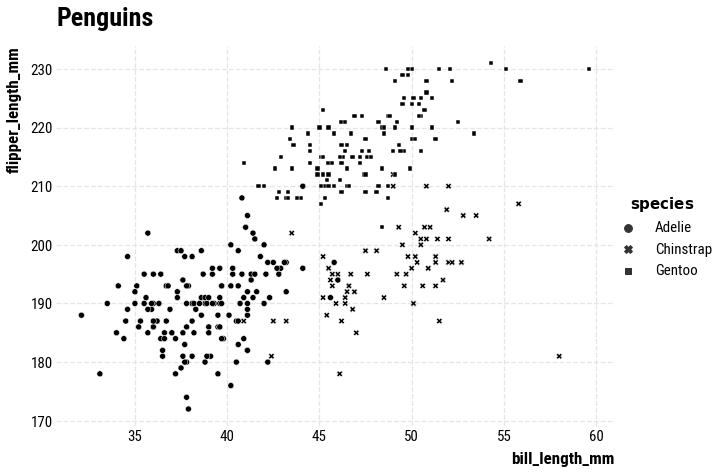

In [ ]:
import seaborn as sns
from matplotlib import font_manager as fm, pyplot as plt
import shutil
import matplotlib
import pandas as pd

#Loading the data:

penguins = sns.load_dataset("penguins")


f, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", data=penguins,
            style='species',c='black')

ax.set_title('Penguins')

plt.savefig('img/outofthebox_penguins.png',bbox_inches='tight',dpi =400, transparent=False)

In [ ]:
%load_ext autoreload
%autoreload 2
import opinionated

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
plt.style.use("opinions_rc")

f, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", style='species',c='black',
                data=penguins,
                s=100, alpha=0.9)

# ax.set_title('Penguins')
ax.legend(title='Species')
opinionated.add_attribution('by Maximilian Noichl')
opinionated.set_title_and_suptitle('Penguins!','They are a very good type of bird!')


# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=2, hspace=2) 
plt.savefig('img/opinions_rc_example.png',#bbox_inches='tight',
              dpi =400, transparent=False)

That's it! If you have ideas for how to improve the stylesheet, please tell me!

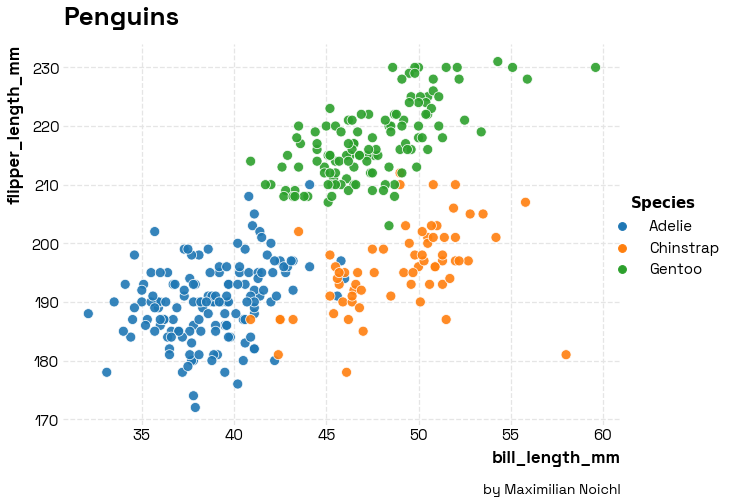

In [ ]:
plt.style.use("opinions_space_grotesk")

f, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", hue='species', data=penguins,
                s=100, alpha=0.9)

ax.set_title('Penguins')
ax.legend(title='Species')
opinionated.add_attribution(ax,'by Maximilian Noichl')

plt.savefig('img/opinions_rc_example.png',bbox_inches='tight',dpi =400, transparent=False)

In [ ]:

from opinionated.core import download_googlefont
download_googlefont('Lobster', add_to_cache=True)

Font saved to: /content/gdrive/MyDrive/opinionated/opinionated/fonts


In [ ]:
from opinionated.core import show_installed_fonts
show_installed_fonts()


NameError: ignored

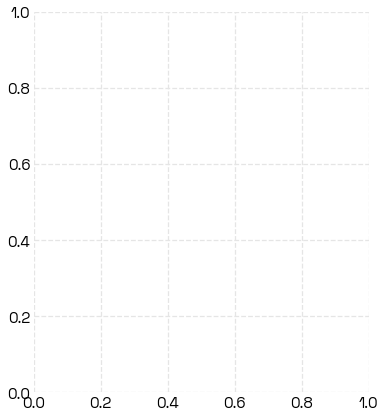

In [ ]:


f, ax = plt.subplots(figsize=(6, 7))

# If you want even more of the hrbrthemes-feeling you can change the font to Roboto Condensed. 
# Sometimes you will need to call the plotting function multiple times for this to take effect.
# You should be able to put any google-font here:
plt.rc('font', family='Lobster') 

sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="#ff2500", alpha=.9)
ax.set_title('Some Data 77')
ax.set_ylabel("State")
ax.set_xlabel("Total")
plt.show()
# Now lets save with good defaults:
# plt.savefig('my_sample_plot.png',bbox_inches='tight',dpi =400, transparent=False)

In [ ]:


f, ax = plt.subplots(figsize=(6, 7))

# If you want even more of the hrbrthemes-feeling you can change the font to Roboto Condensed. 
# Sometimes you will need to call the plotting function multiple times for this to take effect.
# You should be able to put any google-font here:
plt.rc('font', family='Roboto Condensed') 

sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="#ff2500", alpha=.9)
ax.set_title('Some Data 77')
ax.set_ylabel("State")
ax.set_xlabel("Total")

def add_attribution(attrib = 'by me'):
  plt.figtext( .95, -0.015, attrib, ha="right", fontsize=18)#, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
add_attribution(attrib='by Maximilian Noichl')



plt.show()


In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
tips = sns.load_dataset("tips")

plt.rc('font', family='Montserrat') 

sns.scatterplot(data=tips, x="total_bill", y="tip")

ax.set_title('Some Data 77')
ax.set_ylabel("Tip")
ax.set_xlabel("Bill")

def add_attribution(attrib = 'by me'):
  plt.figtext( .95, -0.015, attrib, ha="right", fontsize=18)
add_attribution(attrib='by Maximilian Noichl')



plt.show()
